## Notebook to keep track image processing of all the subjects

- Original DICOMs live on the bic DICOM server bic:/data/dicom
- Simlnks are here: /data/pd/qpn/dicom

### Data processing pipelines
- Hediconv: BIDS
- freesurfer
- fmriprep

In [2]:
import pandas as pd
import numpy as np

ID_list_dir = "/home/nikhil/projects/Parkinsons/QPN_processing/metadata/ID_lists/"

# QPN/COPN LORIS
loris_imaging_subject_list_v1 = f"{ID_list_dir}subjects/COPN_loris_imaging_subject_list_11_April_2022.csv"

# DICOMS (bic:/data/pd/qpn/dicom)
DICOMS_list = f"{ID_list_dir}dicoms/bic_pd_qpn_dicom_ids.txt"
DICOMS_heudiconv_list = f"{ID_list_dir}dicoms/bic_pd_qpn_dicom_heudiconv_ids.txt"

# BIDS (bic:/data/pd/qpn/bids)
BIDS_subject_list = f"{ID_list_dir}subjects/BIDS_subject_ids.txt"
BIDS_issues_multirun_list = f"{ID_list_dir}subjects/BIDS_multiple_runs_subject_ids.txt"

# FMRIPREP + FREESURFER (bic:/data/pd/qpn/fmriprep)
fmriprep_subject_list = f"{ID_list_dir}subjects/fmriprep_subject_ids.txt"
freesurfer_subject_list = f"{ID_list_dir}subjects/freesurfer_subject_ids.txt"
fmriprep_issues_fmap_phase_dir_list = f"{ID_list_dir}subjects/fmriprep_fmap_PA_phase_encoding_dir_issue_subject_ids.txt"

# TractoFlow (Etienne)
tractoflow_subject_list = f"{ID_list_dir}subjects/tractoflow_subject_ids.txt"

### QPN/COPN subject with images

In [4]:
# loris_subject_df = pd.read_csv(loris_imaging_subject_list_v1)
# n_loris_subjects = len(loris_subject_df)
# n_unique_loris_subjects = len(loris_subject_df["PSCID"].unique())
# print(f"Number of subject in the LORIS csv: {n_loris_subjects} ({n_unique_loris_subjects} unique)")

# loris_subject_df = loris_subject_df[["PSCID","DCCID","Vist Label"]]

# # Filter visit 01 (i.e. BIDS ses-01)
# loris_visit_01_df = loris_subject_df[loris_subject_df["Vist Label"]=="MRI01"].copy()
# loris_visit_01_df["bids_name"] = loris_visit_01_df["PSCID"].astype(str) \
#                                                 + "D" + loris_visit_01_df["DCCID"].astype(str)

# loris_visit_01_df = loris_visit_01_df[["PSCID","DCCID","bids_name"]]

# n_copn_visit_01_subjects = len(loris_visit_01_df)
# n_unique_copn_visit_01_subjects = len(loris_visit_01_df["PSCID"].unique())
# print(f"Number of visit 01 subject: {n_copn_visit_01_subjects} ({n_unique_copn_visit_01_subjects} unique)")

# loris_visit_01_df.head()

### BIC dicom list
- This may contain multiple dicoms associated with single PSCID

In [6]:
# dicom_df = pd.read_csv(DICOMS_list,header=None,names=["dicom_name"])
# dicom_names = dicom_df["dicom_name"]
# n_dicoms = len(dicom_names)
# print(f"number dicoms available: {n_dicoms}")

# dicom_df["PSCID"] = dicom_df["dicom_name"].str.split("_",expand=True)[0].astype(str)
# n_dicom_PSCID = len(dicom_df["PSCID"])
# n_unique_dicom_PSCID = len(dicom_df["PSCID"].unique())
# print(f"number of PSCID {n_dicom_PSCID} ({n_unique_dicom_PSCID} unique)")
# dicom_df.head()

### BIC DICOM Heudiconv list
- The multiple dicoms are resoloved before they are transferred to bids_heudiconv 

In [4]:
dicom_heudiconv_df = pd.read_csv(DICOMS_heudiconv_list,header=None,names=["bids_name"])
bids_name = dicom_heudiconv_df["bids_name"].unique()
n_dicoms = len(bids_name)
print(f"number dicoms submitted for heudiconv: {n_dicoms}")
dicom_heudiconv_df["heudiconv_input"] = 1
dicom_heudiconv_df.head()

number dicoms submitted for heudiconv: 148


,bids_name,heudiconv_input
0,MNI0056D864854,1
1,MNI0058D197308,1
2,MNI0068D842090,1
3,MNI0103D369057,1
4,MNI0109D584299,1


### Merge COPN LORIS list with BIC DICOM list

In [5]:
# merge available dicoms (including duplicate subjects)
loris_dicom_visit_01_df = pd.merge(loris_visit_01_df, dicom_df, on="PSCID",how="left")

loris_dicom_heudiconv_visit_01_df = pd.merge(loris_dicom_visit_01_df,dicom_heudiconv_df, on="bids_name",how="left")

n_copn_and_dicom_PSCID = len(loris_dicom_heudiconv_visit_01_df["PSCID"])
n_unique_copn_and_dicom_PSCID = len(loris_dicom_heudiconv_visit_01_df["PSCID"].unique())
print(f"number of PSCID {n_copn_and_dicom_PSCID} ({n_unique_copn_and_dicom_PSCID} unique)")

loris_dicom_heudiconv_visit_01_df.head()

number of PSCID 184 (169 unique)


,PSCID,DCCID,bids_name,dicom_name,heudiconv_input
0,MNI0056,864854,MNI0056D864854,MNI0056_864854_MRI01_MNI_20210818_151510608,1.0
1,MNI0058,197308,MNI0058D197308,MNI0058_197308_MRI01_MNI_20210818_105219098,1.0
2,MNI0068,842090,MNI0068D842090,MNI0068_842090_MRI01_MNI_20210827_150412426,1.0
3,MNI0079,760662,MNI0079D760662,NaN,NaN
4,MNI0103,369057,MNI0103D369057,MNI0103_369057_MRI01_MNI_20211116_132143505,1.0


### Subjects with ambiguous dicoms

In [6]:
# Filter subset NOT submitted for processing
dicom_issues_visit_01_df = loris_dicom_heudiconv_visit_01_df[loris_dicom_heudiconv_visit_01_df["heudiconv_input"].isna()].copy()
n_dicom_issues = len(dicom_issues_visit_01_df["bids_name"].unique())
print(f"number of subjects NOT submitted for heudiconv: {n_dicom_issues}")
dicom_issues_visit_01_df

number of subjects NOT submitted for heudiconv: 21


,PSCID,DCCID,bids_name,dicom_name,heudiconv_input
3,MNI0079,760662,MNI0079D760662,NaN,NaN
11,MNI0148,123309,MNI0148D123309,NaN,NaN
14,MNI0194,737229,MNI0194D737229,NaN,NaN
16,MNI0202,612547,MNI0202D612547,NaN,NaN
17,MNI0206,990135,MNI0206D990135,NaN,NaN
18,MNI0215,857119,MNI0215D857119,NaN,NaN
19,MNI0216,758101,MNI0216D758101,NaN,NaN
20,MNI0259,882746,MNI0259D882746,NaN,NaN
21,MNI0301,985322,MNI0301D985322,NaN,NaN
29,PD00122,725903,PD00122D725903,NaN,NaN


In [7]:
# dicom_issues_visit_01_df[["PSCID","DCCID", "bids_name"]].to_csv(f"{ID_list_dir}dicoms/bic_pd_qpn_dicom_issues_ids.txt")

### Filter subset submitted for processing
 - merge selected dicoms for heudiconv conversion
 - Populate image processing status

In [8]:

image_proc_visit_01_df = pd.merge(loris_visit_01_df, dicom_heudiconv_df, on="bids_name",how="left")

n_subjects_loris = len(image_proc_visit_01_df["bids_name"].unique())
n_subjects_heudiconv = len(image_proc_visit_01_df[image_proc_visit_01_df["heudiconv_input"]==1])
print(f"number of subjects submitted to heudiconv: {n_subjects_heudiconv} (out of {n_subjects_loris})")


image_proc_visit_01_df["bids_status"] = "in-progress"
image_proc_visit_01_df["freesurfer_status"] = "in-progress"
image_proc_visit_01_df["fmriprep_status"] = "in-progress"
image_proc_visit_01_df["tractoflow_status"] = "in-progress"
image_proc_visit_01_df["notes"] = ""
image_proc_visit_01_df["bids_name"] = "sub-" + image_proc_visit_01_df["bids_name"]

image_proc_visit_01_df = image_proc_visit_01_df.set_index("bids_name")

image_proc_visit_01_df.head()

number of subjects submitted to heudiconv: 148 (out of 169)


,PSCID,DCCID,heudiconv_input,bids_status,freesurfer_status,fmriprep_status,tractoflow_status,notes
bids_name,,,,,,,,
sub-MNI0056D864854,MNI0056,864854,1.0,in-progress,in-progress,in-progress,in-progress,
sub-MNI0058D197308,MNI0058,197308,1.0,in-progress,in-progress,in-progress,in-progress,
sub-MNI0068D842090,MNI0068,842090,1.0,in-progress,in-progress,in-progress,in-progress,
sub-MNI0079D760662,MNI0079,760662,NaN,in-progress,in-progress,in-progress,in-progress,
sub-MNI0103D369057,MNI0103,369057,1.0,in-progress,in-progress,in-progress,in-progress,


### BIDS outcome

In [9]:
bids_val_df = pd.read_csv(BIDS_subject_list,names=["bids_name"])
bids_val_df["bids_conversion"] = 1
print(bids_val_df.shape)
bids_val_df.head()

(163, 2)


,bids_name,bids_conversion
0,sub-MNI0056D864854,1
1,sub-MNI0058D197308,1
2,sub-MNI0068D842090,1
3,sub-MNI0079D760662,1
4,sub-MNI0103D369057,1


#### BIDS: Subjects with repeat / multuple run scans

In [10]:
multirun_df = pd.read_csv(BIDS_issues_multirun_list,names=["n_runs","bids_name"], delim_whitespace=True, index_col=None)
multirun_df = multirun_df[["bids_name","n_runs"]]
print(f"number of subjects with repeat scans: {len(multirun_df)}")
multirun_df.head()

number of subjects with repeat scans: 26


,bids_name,n_runs
0,sub-MNI0147D193242,6
1,sub-PD01224D713151,40
2,sub-PD01623D856993,2
3,sub-PD01187D237965,2
4,sub-PD00995D280469,4


### FreeSurfer and fmriprep outcome

#### Sanity checks: FreeSurfer stats dir count should be 18 for all subjects

In [7]:
# freesurfer
freesurfer_df = pd.read_csv(freesurfer_subject_list, sep=" ", names=["bids_name","stats_dir_count"]) 
n_freesurfer_subs = len(freesurfer_df['bids_name'].unique())
n_freesurfer_subs_success = len(freesurfer_df[freesurfer_df['stats_dir_count']==18])

print(f"number of freesurfer subjects: {n_freesurfer_subs}, successfully processed: {n_freesurfer_subs_success}")

# fmriprep
fmriprep_df = pd.read_csv(fmriprep_subject_list, sep=" ", names=["bids_name"])
n_fmriprep_subs = len(fmriprep_df['bids_name'].unique())
print(f"number of fmriprep subjects: {n_fmriprep_subs}")

freesurfer_df.head() 

FileNotFoundError: [Errno 2] No such file or directory: '/home/nikhil/projects/QPN_processing/metadata/ID_lists/subjects/freesurfer_subject_ids.txt'

### fmriprep subjects with issues
- These subjects needed some fixes either in naming or metadata (i.e. sidecar json)

In [12]:
fmriprep_issues_df = pd.read_csv(fmriprep_issues_fmap_phase_dir_list, header=None, names=["bids_name"])
fmriprep_issues_df["bids_name"] = "sub-" + fmriprep_issues_df["bids_name"]
print(f"number of subjects with fmriprep issues that needed a fix: {len(fmriprep_issues_df)}")
fmriprep_issues_df.head()

number of subjects with fmriprep issues that needed a fix: 9


,bids_name
0,sub-PD00296D884528
1,sub-PD00869D303763
2,sub-PD01090D446195
3,sub-PD01165D239439
4,sub-PD01232D735320


### Tractoflow subject IDs (from Etienne St-Onge)
- These filenames have DCCID and no PSCID

In [13]:
tractoflow_df = pd.read_csv(tractoflow_subject_list, header=None, names=["filename"]) 
tractoflow_df["DCCID"] = tractoflow_df["filename"].str.split("-",expand=True)[1]
tractoflow_df["DCCID"] = tractoflow_df["DCCID"].astype(int)

n_tractoflow_subs = len(tractoflow_df['DCCID'].unique())

print(f"number of tractoflow subjects: {n_tractoflow_subs}")

tractoflow_df.head()

number of tractoflow subjects: 174


,filename,DCCID
0,COPN-106182-MRI01-1,106182
1,COPN-147562-MRI01-1,147562
2,COPN-171433-MRI01-1,171433
3,COPN-206508-MRI01-1,206508
4,COPN-369057-MRI01-1,369057


### Compare subject lists from TractoFlow and COPN
- TractoFlow was processed separately

In [14]:
_df = image_proc_visit_01_df[["PSCID", "DCCID"]].copy()

copn_loris = set(_df["DCCID"])
etienne = set(tractoflow_df["DCCID"])

copn_missing = etienne - copn_loris
etienne_missing = copn_loris - etienne

print(f"Missing subjects: copn: {len(copn_missing)}, etienne: {len(etienne_missing)}")
    
print(f"Doing an inner join between COPN and Etienne subject lists")

tractoflow_df = pd.merge(tractoflow_df, _df.reset_index(), on="DCCID", how="inner")
tractoflow_df.head()

Missing subjects: copn: 28, etienne: 23
Doing an inner join between COPN and Etienne subject lists


,filename,DCCID,bids_name,PSCID
0,COPN-106182-MRI01-1,106182,sub-PD01751D106182,PD01751
1,COPN-147562-MRI01-1,147562,sub-PD01709D147562,PD01709
2,COPN-171433-MRI01-1,171433,sub-PD01753D171433,PD01753
3,COPN-206508-MRI01-1,206508,sub-PD01660D206508,PD01660
4,COPN-369057-MRI01-1,369057,sub-MNI0103D369057,MNI0103


### Merge all subject lists

In [15]:
qpn_image_proc_status_subject_df = image_proc_visit_01_df.copy()
qpn_image_proc_status_subject_df.loc[bids_val_df["bids_name"],"bids_status"] = "success"
qpn_image_proc_status_subject_df.loc[multirun_df["bids_name"],"notes"] = "contains repeat (i.e. multirun) scans"

qpn_image_proc_status_subject_df.loc[freesurfer_df["bids_name"], "freesurfer_status"] = "success"
qpn_image_proc_status_subject_df.loc[fmriprep_df["bids_name"], "fmriprep_status"] = "success"
qpn_image_proc_status_subject_df.loc[fmriprep_issues_df["bids_name"],"notes"] = "Needed fmap PA phase fix i-->j"

qpn_image_proc_status_subject_df.loc[tractoflow_df["bids_name"], "tractoflow_status"] = "success"

qpn_image_proc_status_subject_df = qpn_image_proc_status_subject_df.reset_index()[["PSCID", "DCCID", "bids_name", 
"notes", "bids_status", "freesurfer_status", "fmriprep_status","tractoflow_status"]]

qpn_image_proc_status_subject_df.head()

,PSCID,DCCID,bids_name,notes,bids_status,freesurfer_status,fmriprep_status,tractoflow_status
0,MNI0056,864854,sub-MNI0056D864854,,success,success,success,success
1,MNI0058,197308,sub-MNI0058D197308,,success,success,success,in-progress
2,MNI0068,842090,sub-MNI0068D842090,,success,success,success,success
3,MNI0079,760662,sub-MNI0079D760662,,success,success,success,success
4,MNI0103,369057,sub-MNI0103D369057,,success,success,success,success


### BIDS failures

In [16]:
bids_rerun_subjects_df = qpn_image_proc_status_subject_df[(qpn_image_proc_status_subject_df["bids_status"]=="in-progress")]

print(f"Number of subjects failing BIDS: {len(bids_rerun_subjects_df)}")

# bids_rerun_subjects_df["bids_name"].to_csv(f"{ID_list_dir}subjects/bids_rerun_subject_ids.csv")

bids_rerun_subjects_df.head()

Number of subjects failing BIDS: 6


,PSCID,DCCID,bids_name,notes,bids_status,freesurfer_status,fmriprep_status,tractoflow_status
47,PD00953,971810,sub-PD00953D971810,,in-progress,in-progress,in-progress,success
57,PD01003,375057,sub-PD01003D375057,,in-progress,in-progress,in-progress,in-progress
137,PD01626,466737,sub-PD01626D466737,,in-progress,in-progress,in-progress,success
147,PD01674,700552,sub-PD01674D700552,,in-progress,in-progress,in-progress,success
156,PD01713,406442,sub-PD01713D406442,,in-progress,in-progress,in-progress,success


### fmriprep failures

In [17]:
fmriprep_rerun_subjects_df = qpn_image_proc_status_subject_df[
    (qpn_image_proc_status_subject_df["bids_status"].isin(["success","success with repeat scans"])) & 
    (qpn_image_proc_status_subject_df["fmriprep_status"]=="in-progress")]

print(f"Number of subjects failing fmriprep: {len(fmriprep_rerun_subjects_df)}")

# fmriprep_rerun_subjects_df["bids_name"].to_csv(f"{ID_list_dir}subjects/fmriprep_rerun_subject_ids.csv")

fmriprep_rerun_subjects_df

Number of subjects failing fmriprep: 0


,PSCID,DCCID,bids_name,notes,bids_status,freesurfer_status,fmriprep_status,tractoflow_status


### TractoFlow failures
- These are most likely subjects yet to be run

In [18]:
tractoflow_rerun_subjects_df = qpn_image_proc_status_subject_df[
    (qpn_image_proc_status_subject_df["bids_status"].isin(["success","success with repeat scans"])) & 
    (qpn_image_proc_status_subject_df["tractoflow_status"]=="in-progress")]

print(f"Number of subjects failing tractoflow: {len(tractoflow_rerun_subjects_df)}")

# tractoflow_rerun_subjects_df["bids_name"].to_csv(f"{ID_list_dir}subjects/tractoflow_rerun_subject_ids.csv")

tractoflow_rerun_subjects_df.head()

Number of subjects failing tractoflow: 22


,PSCID,DCCID,bids_name,notes,bids_status,freesurfer_status,fmriprep_status,tractoflow_status
1,MNI0058,197308,sub-MNI0058D197308,,success,success,success,in-progress
11,MNI0148,123309,sub-MNI0148D123309,,success,success,success,in-progress
14,MNI0194,737229,sub-MNI0194D737229,,success,success,success,in-progress
16,MNI0202,612547,sub-MNI0202D612547,,success,success,success,in-progress
17,MNI0206,990135,sub-MNI0206D990135,,success,success,success,in-progress


- RuntimeError: The FreeSurfer's subject folder </fsdir/sub-MNI0079D760662> contains IsRunning files that may pertain to a current or past execution: (PosixPath('/fsdir/sub-MNI0079D760662/scripts/IsRunning.lh+rh'),).

- find: '/data/pd/qpn/fmriprep/v20.2.7//output/freesurfer-6.0.1/sub-PD00296D884528/': No such file or directory                                                                                


### Save CSV (upload to google drive)

In [20]:
# qpn_image_proc_status_subject_df.to_csv(f"{ID_list_dir}subjects/QPN_image_proc_status.csv")

qpn_image_proc_status_subject_df.head()

,PSCID,DCCID,bids_name,notes,bids_status,freesurfer_status,fmriprep_status,tractoflow_status
0,MNI0056,864854,sub-MNI0056D864854,,success,success,success,success
1,MNI0058,197308,sub-MNI0058D197308,,success,success,success,in-progress
2,MNI0068,842090,sub-MNI0068D842090,,success,success,success,success
3,MNI0079,760662,sub-MNI0079D760662,,success,success,success,success
4,MNI0103,369057,sub-MNI0103D369057,,success,success,success,success


### Plot FS CT surfaces (group)

In [ ]:
def run_mris_preproc(participants_list, out_file, meas="thickness", template="fsaverage"):
    """ A function to run FreeSurfer's mris_preproc command
    """
    participants_str = []
    for participant in participants_list:
        participants_str.append(f"--s {participant} ")

    for hemi in ["lh", "rh"]:
        d = os.path.dirname(out_file)
        f = os.path.basename(out_file)
        out_file = f"{d}/{hemi}_{f}"

        try:
            FS_CMD = "mris_preproc {participants_str} --target {template} --hemi {hemi} --meas {meas} --out {out_file}"
            heudiconv_proc = subprocess.run(FS_CMD)

        except Exception as e:
            print(f"mris_preproc run failed with exceptions: {e}")
    

In [21]:
import os
import subprocess
import numpy as np
import nibabel as nib
from nilearn import datasets, surface, plotting
fsaverage = datasets.fetch_surf_fsaverage("fsaverage")

In [14]:
motor_images = datasets.fetch_neurovault_motor_task()
stat_img = motor_images.images[0]
texture = surface.vol_to_surf(stat_img, fsaverage.pial_right)
texture.shape

(163842,)

In [19]:
data_dir = "/home/nikhil/projects/neuroinformatics_tools/data/test_ds/derivatives/freesurfer/v6.0.1/output/ses-0/tmp_output/"
CT_img = nib.load(f"{data_dir}fs_group_thickness_lh_test.mgh")
avg_CT = np.squeeze(np.mean(CT_img.get_fdata(),axis=3))
avg_CT.shape

(163842,)

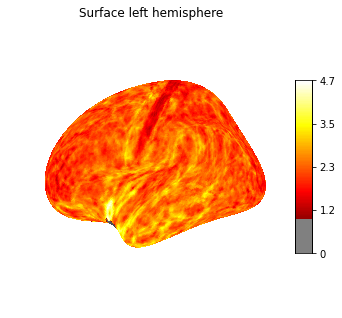

In [20]:
texture = avg_CT
fig = plotting.plot_surf_stat_map(
    fsaverage.infl_left, texture, hemi='left',
    title='Surface left hemisphere', colorbar=True,
    threshold=1., bg_map=fsaverage.sulc_left
)